In [1]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as pl
%matplotlib inline

# This notebook is based on an excellent tutorial by Kostis Gourgoulias (http://kgourgou.me/)

# Specify size of plot
pl.rcParams['figure.figsize'] = (12.0, 10.0)

Text(0.5, 1.0, 'Selected points with their separating line.')

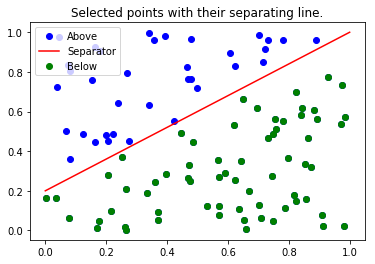

In [2]:
# Generate some points
N = 100
xn = nr.rand(N,2)

x = np.linspace(0,1)

# Pick a line 
#a, b = nr.rand(), nr.rand()
a, b = 0.8, 0.2
f = lambda x : a*x + b

fig = pl.figure()
figa = pl.gca()

pl.plot(xn[:,0],xn[:,1],'bo')
pl.plot(x,f(x),'r')

# Linearly separate the points by the line
yn = np.zeros([N,1])

for i in range(N):
    if(f(xn[i,0])>xn[i,1]):
        # Point is below line
        yn[i] = 1
        pl.plot(xn[i,0],xn[i,1],'go')
    else:
        # Point is above line
        yn[i] = -1
        
        
pl.legend(['Above','Separator','Below'],loc=0)
pl.title('Selected points with their separating line.')
#figa.axes.get_xaxis().set_visible(False)
#figa.axes.get_yaxis().set_visible(False)



A very simple implementation of the perceptron algorithm for two dimensional data.
        
        Given points (x,y) with x in R^{2} and y in {-1,1}, the perceptron learning algorithm searches for the best
        line that separates the data points according to the difference classes defined in y. 

In [3]:
def perceptron(xn, yn, max_iter=1000, w=np.zeros(3)):

    
    N = xn.shape[0]
    
    # Separating curve
    f = lambda x: np.sign(w[0]+w[1]*x[0]+w[2]*x[1])

    for _ in range(max_iter):
        i = nr.randint(N) # try a random sample from the dataset
        print (i, xn[i,0], xn[i,1], f(xn[i,:]), yn[i])
        if(yn[i] != f(xn[i,:])): # If not classified correctly, adjust the line to account for that point.
            w[0] = w[0] + yn[i] # the first weight is effectively the bias
            w[1] = w[1] + yn[i] * xn[i,0]
            w[2] = w[2] + yn[i] * xn[i,1]
            
                
                
            
    return w

Testing perceptron

In [4]:
w = perceptron(xn, yn, max_iter=5)

60 0.360300504178511 0.2439747806870689 0.0 [1.]
16 0.623340027030265 0.25702418067330135 1.0 [1.]
70 0.8939993865542097 0.5614270110267665 1.0 [1.]
86 0.7153209399523902 0.8478405790054028 1.0 [-1.]
81 0.17577806184265943 0.04546520508041674 -1.0 [1.]


In [5]:
w = perceptron(xn, yn)

30 0.08014516419556639 0.3594603931481779 1.0 [-1.]
4 0.5313837525028671 0.12258586461338405 -1.0 [1.]
42 0.47969108189860654 0.9660680931979548 1.0 [-1.]
91 0.7804000836638093 0.9595900103454951 -1.0 [-1.]
90 0.16277907860444296 0.4452413954531933 -1.0 [-1.]
45 0.7078097294283141 0.06164975318252752 -1.0 [1.]
98 0.9747258526923215 0.7352084772454284 1.0 [1.]
85 0.8566393289364774 0.16080262434891734 1.0 [1.]
58 0.16443383375736087 0.9262529542860581 -1.0 [-1.]
58 0.16443383375736087 0.9262529542860581 -1.0 [-1.]
86 0.7153209399523902 0.8478405790054028 -1.0 [-1.]
80 0.23834171917661495 0.6454696995272217 1.0 [-1.]
70 0.8939993865542097 0.5614270110267665 -1.0 [1.]
25 0.26656733264409715 0.0026523084769158878 1.0 [1.]
16 0.623340027030265 0.25702418067330135 1.0 [1.]
64 0.369338029463831 0.053780249932593116 1.0 [1.]
57 0.8239467329461098 0.7002269562597409 1.0 [1.]
37 0.7461525257953234 0.2739290968067901 1.0 [1.]
74 0.4675504818596894 0.7650433770959378 1.0 [-1.]
56 0.044492074733071

5 0.25255773537258774 0.3723251933572769 1.0 [1.]
79 0.8527095358191252 0.33617301418863155 1.0 [1.]
22 0.47127622126915836 0.3296223304197261 1.0 [1.]
3 0.1537932837890046 0.758693987089548 -1.0 [-1.]
12 0.22252399449701288 0.4870907773458666 -1.0 [-1.]
99 0.7306559360953747 0.9606076013188659 -1.0 [-1.]
65 0.7220186791080528 0.913875325511103 -1.0 [-1.]
34 0.63724898563796 0.10901874758816987 1.0 [1.]
34 0.63724898563796 0.10901874758816987 1.0 [1.]
88 0.9829066186683387 0.02422359219372827 1.0 [1.]
3 0.1537932837890046 0.758693987089548 -1.0 [-1.]
11 0.9712127582302252 0.5350778899345849 1.0 [1.]
78 0.07410063167069003 0.8350509217692195 -1.0 [-1.]
45 0.7078097294283141 0.06164975318252752 1.0 [1.]
81 0.17577806184265943 0.04546520508041674 1.0 [1.]
75 0.5701338848079595 0.07720093461641553 1.0 [1.]
2 0.4979225055740243 0.7198369497446304 -1.0 [-1.]
23 0.7582835809730948 0.5117418288832241 1.0 [1.]
78 0.07410063167069003 0.8350509217692195 -1.0 [-1.]
13 0.838773694900337 0.580453145

Text(0.5, 1.0, 'Classification based on f(x)')

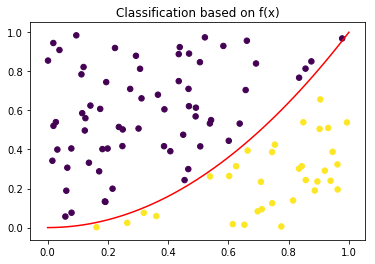

In [6]:
# selecting points with respect to a different curve.
f = lambda x: x**2;

x = np.linspace(0,1);

# Generate some data points to play with.
N = 100
xn = nr.rand(N,2)

fig = pl.figure()
figa = pl.gca();

# Plot classifier 
pl.plot(x,f(x),'r')

# Classify based on f(x)
yn = np.sign(f(xn[:,0])-xn[:,1])

colors = (yn+1)/2.0;

pl.scatter(xn[:,0],xn[:,1],c=colors,s=30);
pl.title('Classification based on f(x)')

80 0.9392505955433318 0.23974759545816027 1.0 1.0
27 0.6916903622325205 0.8400985374750816 -1.0 -1.0
92 0.3017974245873274 0.507101868392013 -1.0 -1.0
59 0.09517964920165822 0.9841037618738236 -1.0 -1.0
56 0.4676391952144422 0.7101632111739662 -1.0 -1.0
74 0.16226509455860838 0.0019459041312500647 1.0 1.0
53 0.745470086217864 0.12488865100418978 1.0 1.0
28 0.23640843230777764 0.5150391929326562 -1.0 -1.0
44 0.775705766663965 0.005722931646482077 1.0 1.0
19 0.061989952737405485 0.18885103692102745 1.0 -1.0
36 0.8567105752875492 0.24310221135501653 1.0 1.0
7 0.18185338758588077 0.4018404196728689 -1.0 -1.0
14 0.6375504046171154 0.5323619732296129 -1.0 -1.0
17 0.38770269452839934 0.6054264242230066 -1.0 -1.0
46 0.9050331505045857 0.6561599935940574 -1.0 1.0
49 0.5220383113794876 0.973792457179084 -1.0 -1.0
0 0.697156804570681 0.08324014437643446 1.0 1.0
82 0.14203924601035256 0.6245495397670812 -1.0 -1.0
77 0.3607100342745131 0.058872088091408314 1.0 1.0
75 0.46944486054435 0.890636326383

53 0.745470086217864 0.12488865100418978 1.0 1.0
96 0.03927905672022658 0.909104698681781 -1.0 -1.0
41 0.5385170190311869 0.5330645053032651 -1.0 -1.0
20 0.03233107682084446 0.39951801773055895 -1.0 -1.0
48 0.1710771373874811 0.2879814957436483 -1.0 -1.0
75 0.46944486054435 0.8906363263839746 -1.0 -1.0
19 0.061989952737405485 0.18885103692102745 -1.0 -1.0
41 0.5385170190311869 0.5330645053032651 -1.0 -1.0
45 0.26434560349217473 0.024353436415457064 1.0 1.0
12 0.36607912774542617 0.6802368837243975 -1.0 -1.0
99 0.7449609922942871 0.3867223517871413 1.0 1.0
74 0.16226509455860838 0.0019459041312500647 1.0 1.0
5 0.8560547573705167 0.8136981063791676 -1.0 -1.0
74 0.16226509455860838 0.0019459041312500647 1.0 1.0
63 0.293226336957749 0.8795095425254296 -1.0 -1.0
33 0.6573247661611639 0.7041915887102217 -1.0 -1.0
23 0.4385700816491622 0.9237887454690825 -1.0 -1.0
73 0.13710204532941173 0.3320277648820209 -1.0 -1.0
26 0.8954508064505232 0.23606325753123136 1.0 1.0
27 0.6916903622325205 0.8400

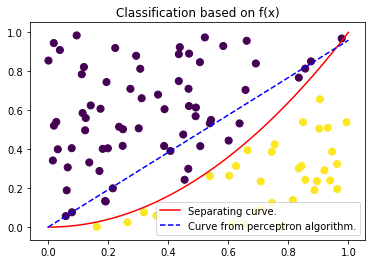

In [7]:
# Try percepton with that data.
w = perceptron(xn, yn, max_iter=1000)

# Re-scale the weights to construct a new representation
bnew = -w[0]/w[2];
anew = -w[1]/w[2];
y = lambda x: anew * x + bnew;

figa = pl.gca()
pl.scatter(xn[:,0],xn[:,1],c=colors,s=50);
pl.title('Classification based on f(x)')

pl.plot(x,f(x),'r',label='Separating curve.')
pl.plot(x,y(x),'b--',label = 'Curve from perceptron algorithm.')

pl.legend()